# Introduction to the problem
<br>
Data visualization and Technical Analysis
<br>
<br>
'A picture speaks a thousand words' has never been truer in financial markets. Absolutely no one goes through the millions  of rows of numbers, we always prefer the data in a plotted form to draw better inferences. This module would cover the plotting, basic technical indicators and our own customisation, and making our own trade calls!
You should target to finish module 2


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #seaborn is more compatible library when we are comparing two data series
import warnings
warnings.filterwarnings('ignore')

<b>Problem Statement 2.1</b><br>
<br>
Load the week2.csv file into a dataframe. What is the type of the Date column? Make sure it is of type datetime64. Convert the Date column to the index of the dataframe.
Plot the closing price of each of the days for the entire time frame to get an idea of what the general outlook of the stock is.

 Look out for drastic changes in this stock, you have the exact date when these took place, try to fetch the news for this day of this stock

 This would be helpful if we are to train our model to take NLP inputs.


In [2]:
data=pd.read_csv('data/week2.csv')
data.tail() #returns last few rows of the dataset 

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Date_new,month,Day_Perc_Change,Trend
489,HDFCBANK,EQ,07-May-2019,2328.45,2351.90,2358.00,2318.00,2320.1,2322.35,2338.90,2481051,5.802928e+09,114540,1326590,53.47,2019-05-07,May-2019,-0.261977,Slight or No Change
490,HDFCBANK,EQ,08-May-2019,2322.35,2322.55,2323.80,2288.00,2309.0,2307.25,2304.51,3016052,6.950518e+09,101965,1942147,64.39,2019-05-08,May-2019,-0.650203,Slight Negative
491,HDFCBANK,EQ,09-May-2019,2307.25,2300.00,2300.00,2271.60,2292.0,2290.90,2287.67,2256931,5.163124e+09,129719,1470611,65.16,2019-05-09,May-2019,-0.708636,Slight Negative
492,HDFCBANK,EQ,10-May-2019,2290.90,2291.35,2324.90,2291.35,2296.5,2296.50,2306.93,2648550,6.110008e+09,79307,1542118,58.22,2019-05-10,May-2019,0.244445,Slight or No Change
493,HDFCBANK,EQ,13-May-2019,2296.50,2296.05,2313.35,2280.00,2287.3,2287.20,2297.73,2767908,6.359892e+09,145875,1652663,59.71,2019-05-13,May-2019,-0.404964,Slight or No Change


In [3]:
plt.style.use('fivethirtyeight') #a particular style is chosen, you can choose anything, generally used for giving styling to fonts
data.dtypes

Symbol                     object
Series                     object
Date                       object
Prev Close                float64
Open Price                float64
High Price                float64
Low Price                 float64
Last Price                float64
Close Price               float64
Average Price             float64
Total Traded Quantity       int64
Turnover                  float64
No. of Trades               int64
Deliverable Qty             int64
% Dly Qt to Traded Qty    float64
Date_new                   object
month                      object
Day_Perc_Change           float64
Trend                      object
dtype: object

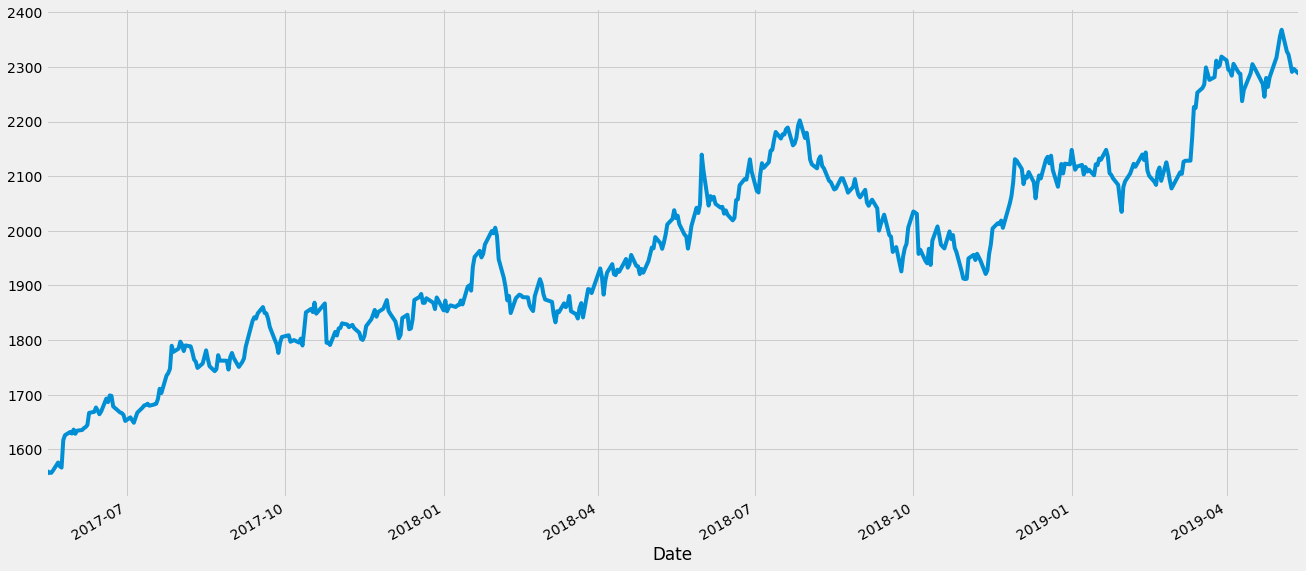

In [4]:
data['Date']=pd.to_datetime(data['Date_new'])
data.drop('Date_new',inplace=True, axis=1)
data.index=data.Date
data['Close Price'].plot(figsize=(20,10))


<b>Problem Statement 2.2 </b><br><br>
A stem plot is a discrete series plot, ideal for plotting daywise data. It can be plotted using the plt.stem() function.

Display a stem plot of the daily change in of the stock price in percentage. This column was calculated in module 1 and should be already available in week2.csv. Observe whenever there's a large change.


<StemContainer object of 3 artists>

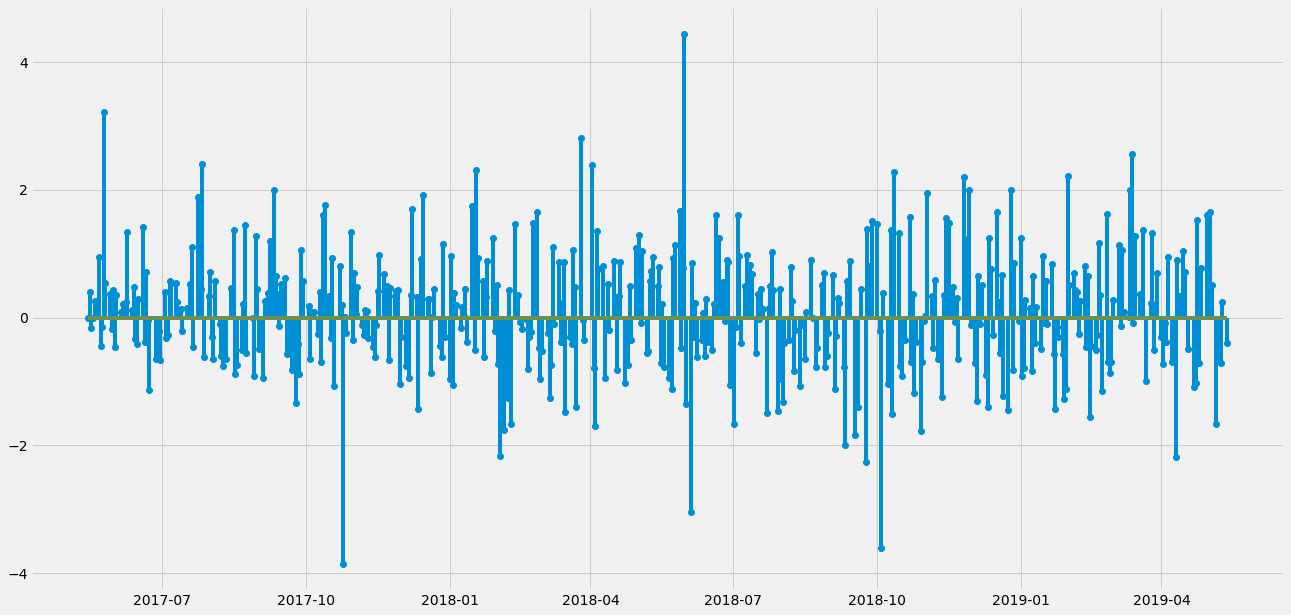

In [5]:
fig=plt.figure(figsize=(20,10))
plt.stem(data.Date ,data.Day_Perc_Change) #A stem plot is a discrete plotting instead of being a continues plotting

<b>Problem Statement 2.3 </b><br><br>
Plot the daily volumes as well and compare the percentage stem plot to it. Document your analysis of the relationship between volume and daily percentage change.

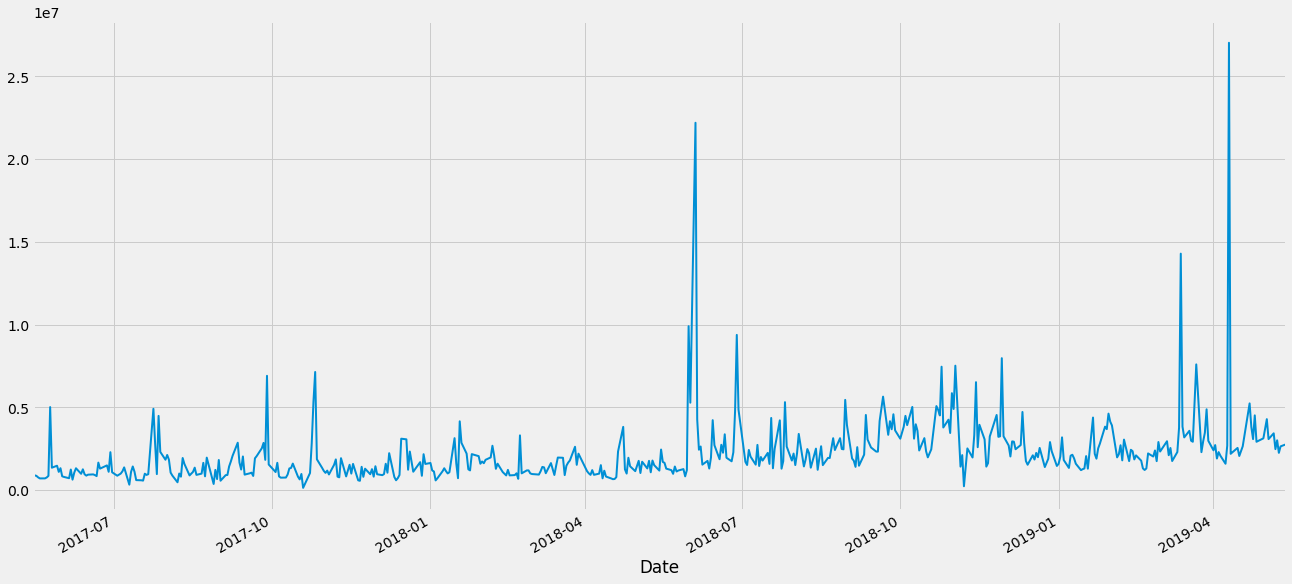

In [6]:
data['Total Traded Quantity'].plot(figsize=(20,10),lw=2)

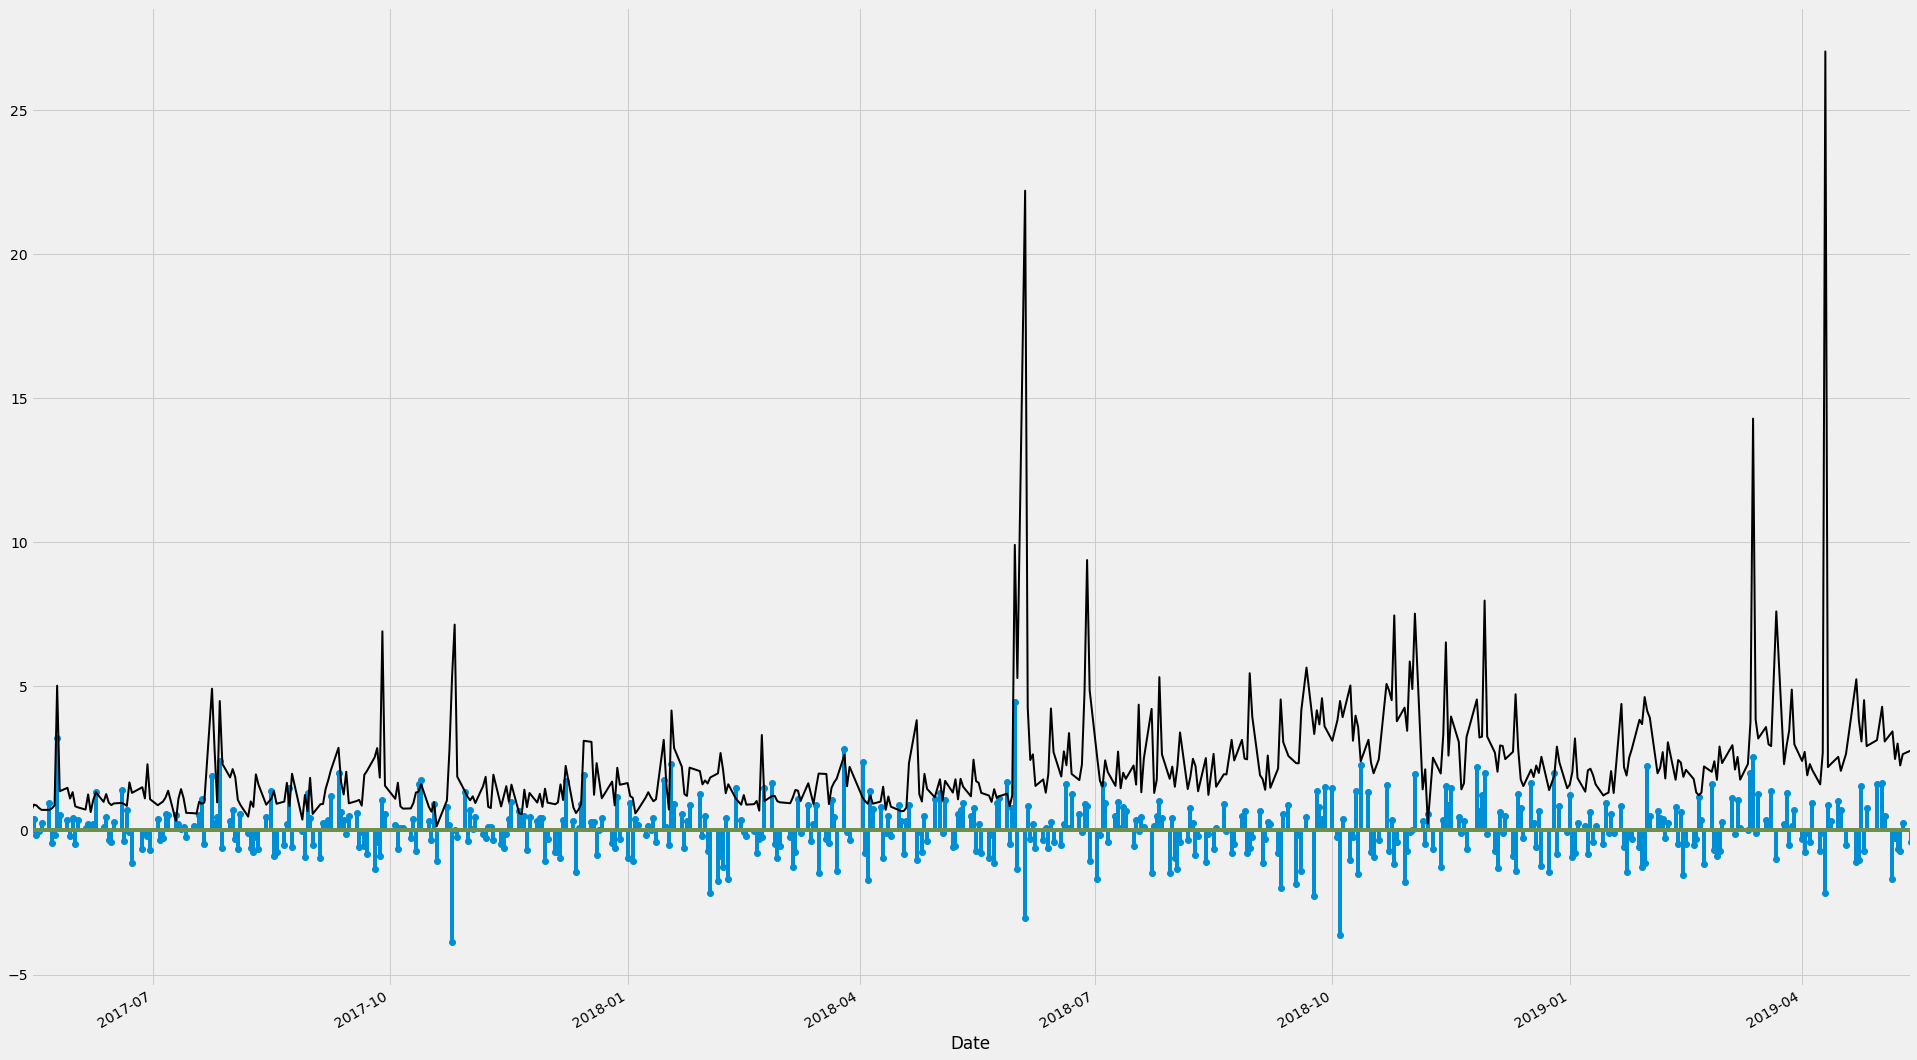

In [7]:
fig=plt.figure(figsize=(30,20))
plt.stem(data.Date ,data.Day_Perc_Change)
(data['Total Traded Quantity']/1000000).plot(figsize=(30,20),lw=2, c='k')

<b>Problem Statement 2.4 </b><br><br>
We had created a Trend column in module 1. We want to see how often each Trend type occurs. This can be seen as a    pie chart, with each sector representing the percentage of days each trend occurs. Plot a pie chart for all the 'Trend' to know about relative frequency of each trend. You can use the groupby function with the trend column to group all days with the   same trend into a single group before plotting the pie chart. From the grouped data, create a BAR plot of average & median values of the 'Total Traded Quantity' by Trend type.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000010D945C50>],
      dtype=object)

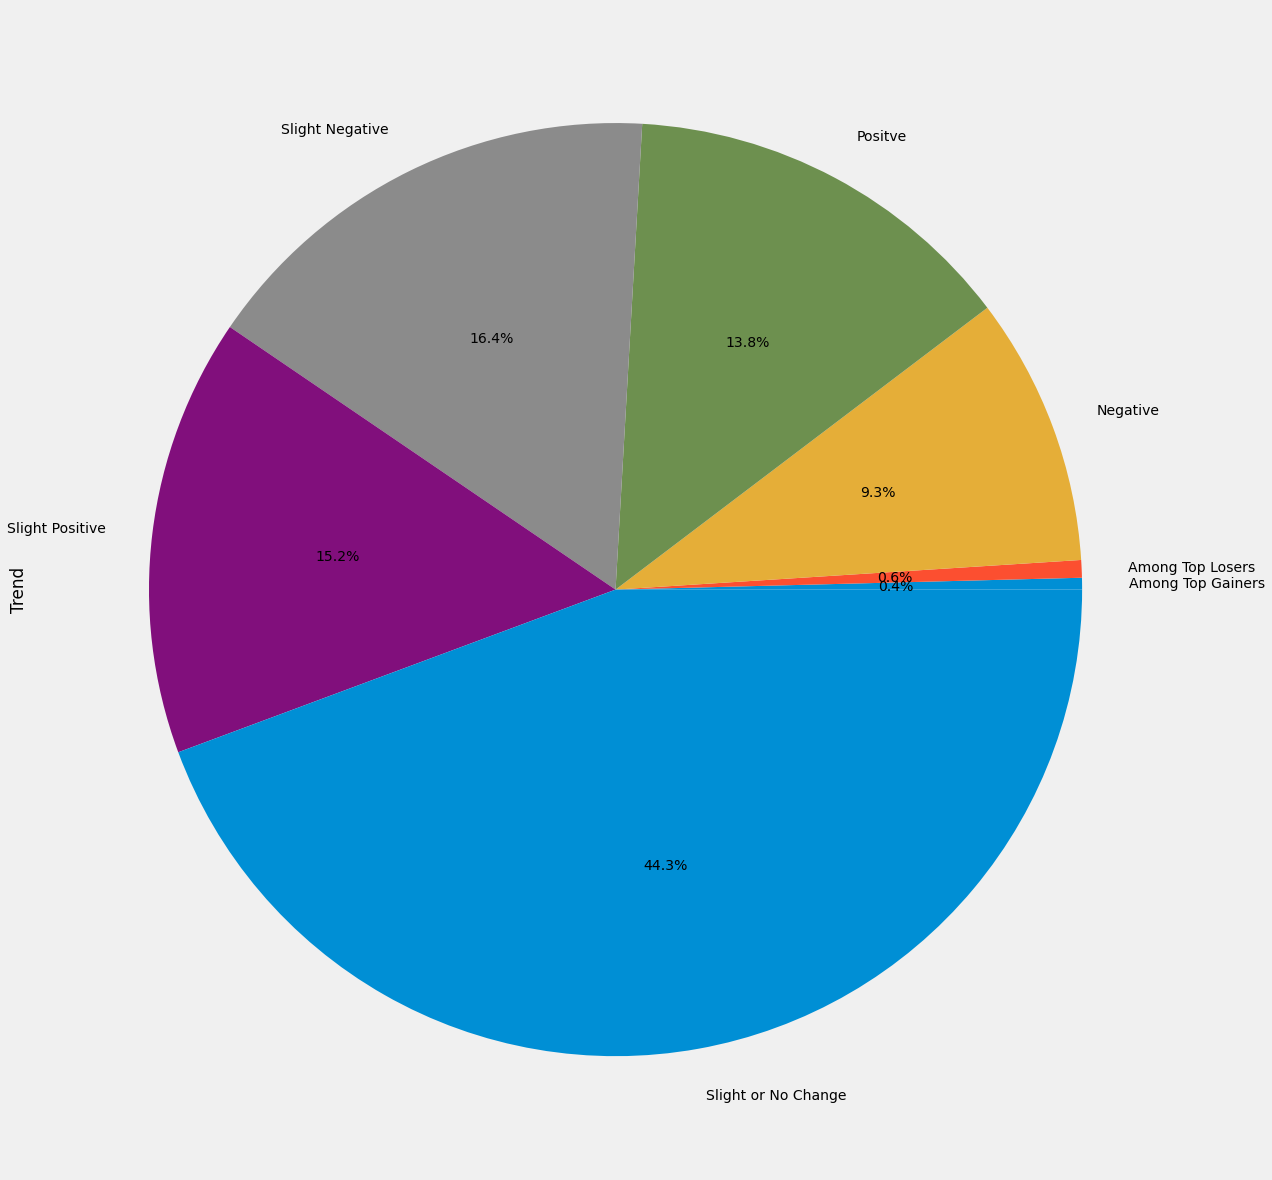

In [8]:
pie_data=data.groupby('Trend').Trend.count() #Group the data by trend and just simply plot the count of each trend
pie_data.plot.pie(subplots=True, figsize=(20,20),autopct='%1.1f%%') #autoconvert to absolute value to percentages

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000010D46D198>,
      dtype=object)

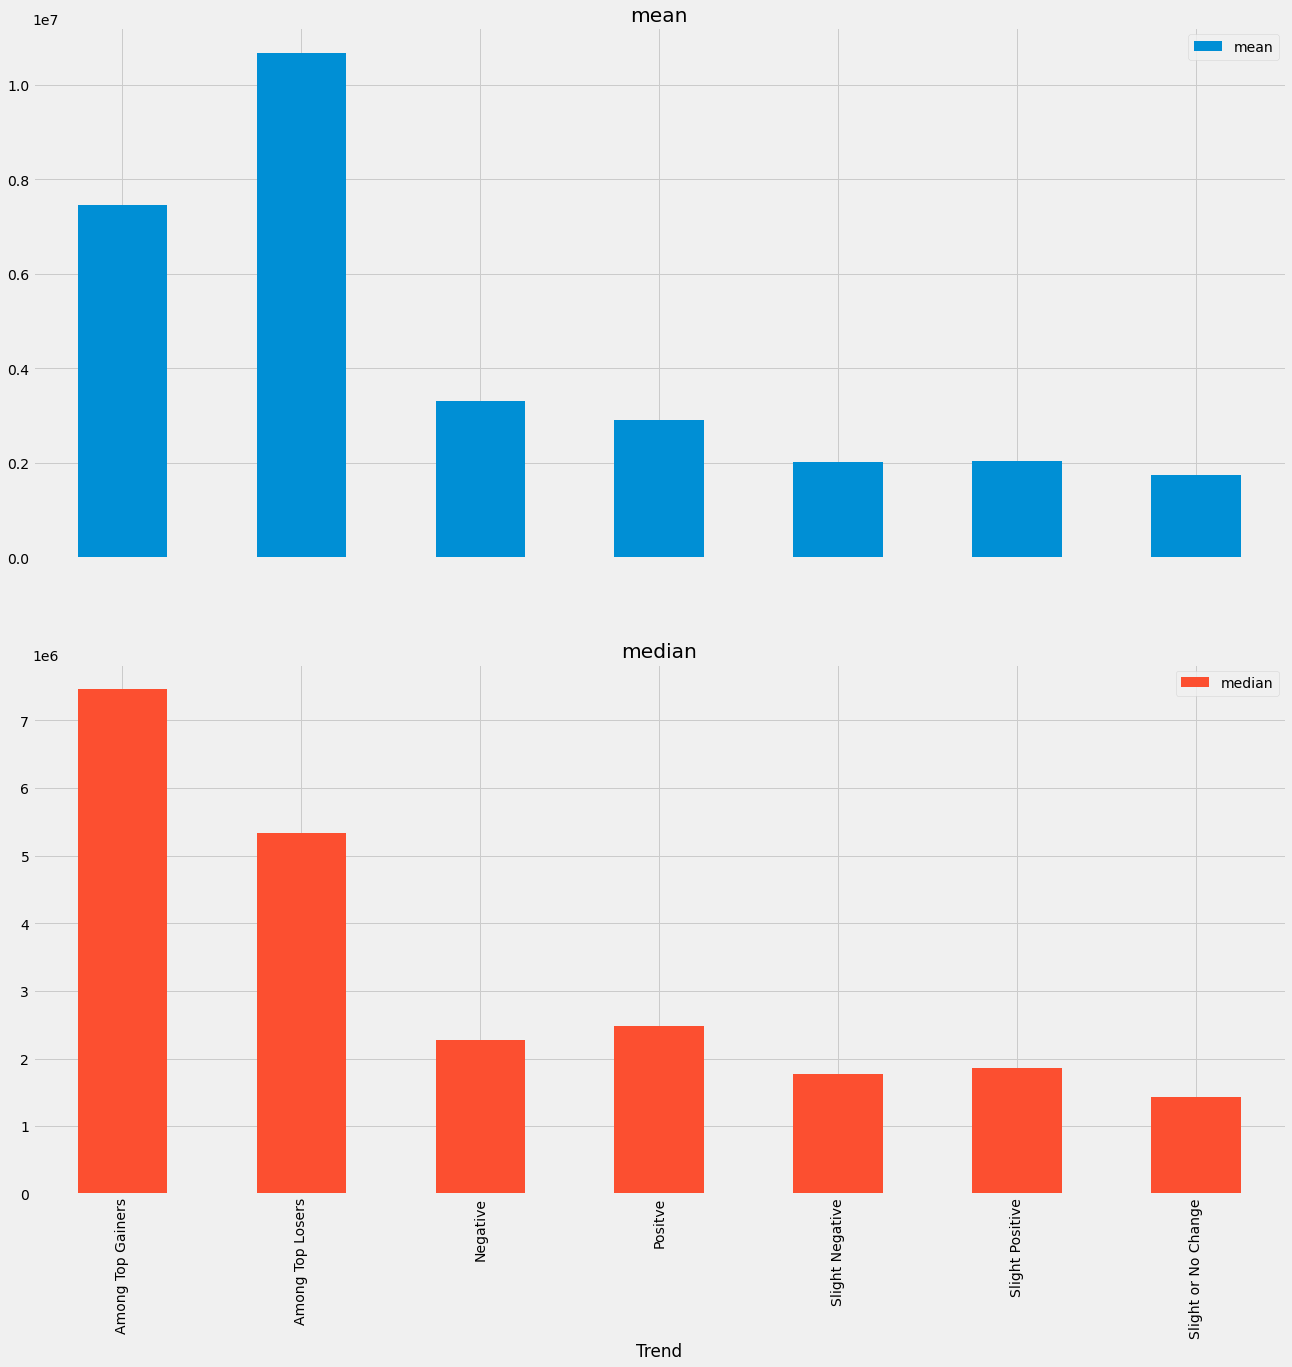

In [9]:
bar_data=data.groupby('Trend')['Total Traded Quantity'].agg(['mean','median'])
bar_data.plot.bar(subplots=True, figsize=(20,20))

<b> Problem Statement 2.5 </b><br><br>
Plot the daily return (percentage) distribution as a histogram.
Histogram analysis is one of the most fundamental methods of exploratory data analysis. In this case, it'd return a frequency plot of various values of percentage changes .


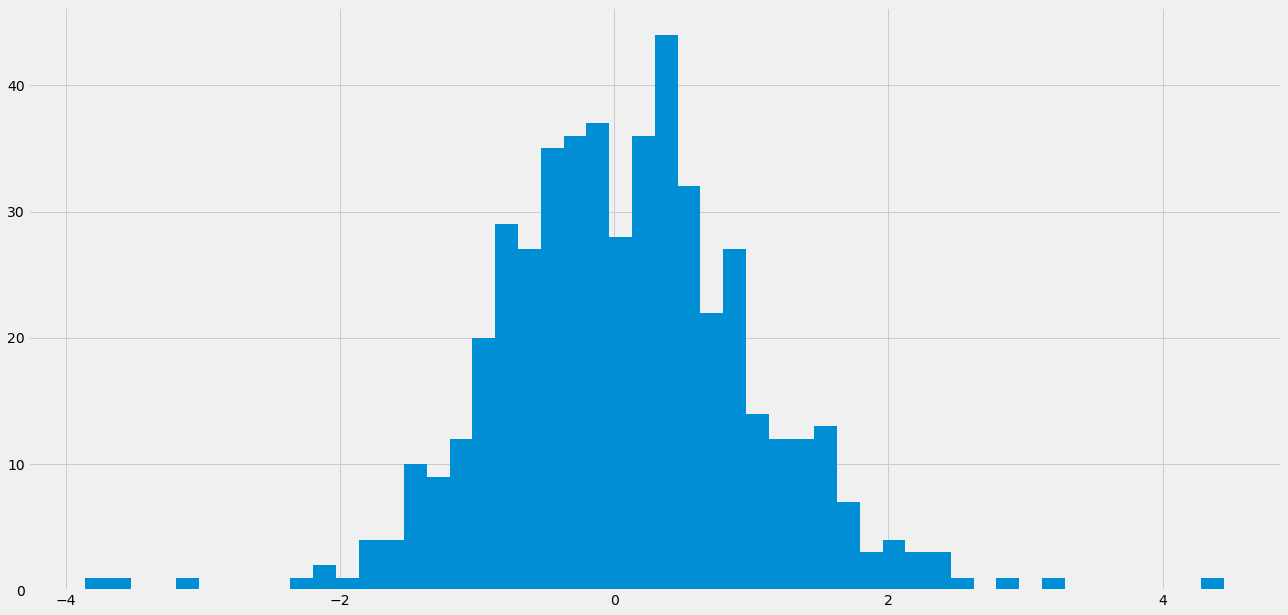

count    494.000000
mean       0.082802
std        0.945518
min       -3.856248
25%       -0.523253
50%        0.079519
75%        0.639717
max        4.447482
Name: Day_Perc_Change, dtype: float64


In [10]:
data.Day_Perc_Change.hist(bins=50, figsize=(20,10))
plt.show()
print(data.Day_Perc_Change.describe())

<b> Problem Statement 2.6 </b> <br><br>
We next want to analyse how the behaviour of different stocks are correlated. The correlation is performed on the percentage change of the stock price instead of the stock price.

Load any 5 stocks of your choice into 5 dataframes. Retain only rows for which ‘Series’ column has value ‘EQ’. Create a   single dataframe which contains the ‘Closing Price’ of each stock. This dataframe should hence have five columns. Rename each column to the name of the stock that is contained in the column. Create a new dataframe which is a percentage     change of the values in the previous dataframe. Drop Nan’s from this dataframe.
Using seaborn, analyse the correlation between the percentage changes in the five stocks. This is extremely useful for a fund manager to design a diversified portfolio. To know more, check out these resources on correlation (https://www.investopedia.com/terms/c/correlation.asp) and diversification


In [12]:
data1=pd.read_csv('data/TCS.csv')
data2=pd.read_csv('data/TITAN.csv')
data3=pd.read_csv('data/CIPLA.csv')
data4=pd.read_csv('data/BAJFINANCE.csv')
data5=pd.read_csv('data/RELIANCE.csv')
datai=pd.read_csv('data/AXISBANK.csv')



In [13]:
data1=data1[data1.Series=='EQ']
data1.reset_index(inplace=True, drop=True)
data2=data2[data2.Series=='EQ']
data2.reset_index(inplace=True, drop=True)
data3=data3[data3.Series=='EQ']
data3.reset_index(inplace=True, drop=True)
data4=data4[data4.Series=='EQ']
data4.reset_index(inplace=True, drop=True)
data5=data5[data5.Series=='EQ']
data5.reset_index(inplace=True, drop=True)






In [14]:
data1=data1[['Close Price']]
data1.columns=['TCS']
data2=data2[['Close Price']]
data2.columns=['TITAN']
data3=data3[['Close Price']]
data3.columns=['CIPLA']
data4=data4[['Close Price']]
data4.columns=['BAJFINANCE']
data5=data5[['Close Price']]
data5.columns=['RELIANCE']
datai=datai[['Close Price']]
datai.columns=['AXISBANK']

In [15]:
compare=pd.concat([data1,data2,data3,data4,data5,datai],axis=1)
compare

,TCS,TITAN,CIPLA,BAJFINANCE,RELIANCE,AXISBANK
0,2365.10,483.65,569.00,1332.95,1344.10,500.10
1,2429.15,488.30,565.60,1347.75,1356.30,501.50
2,2455.35,481.75,562.35,1324.80,1353.10,502.80
3,2536.20,471.65,560.10,1314.55,1327.35,492.00
4,2507.15,471.15,564.95,1289.15,1318.85,501.70
...,...,...,...,...,...,...
490,2152.85,1088.70,558.00,2921.30,1299.45,741.85
491,2172.55,1104.45,557.75,2971.35,1256.45,735.50
492,2135.80,1132.10,555.55,2922.85,1251.15,731.00
493,2128.75,1144.70,546.70,2931.85,1232.05,735.05


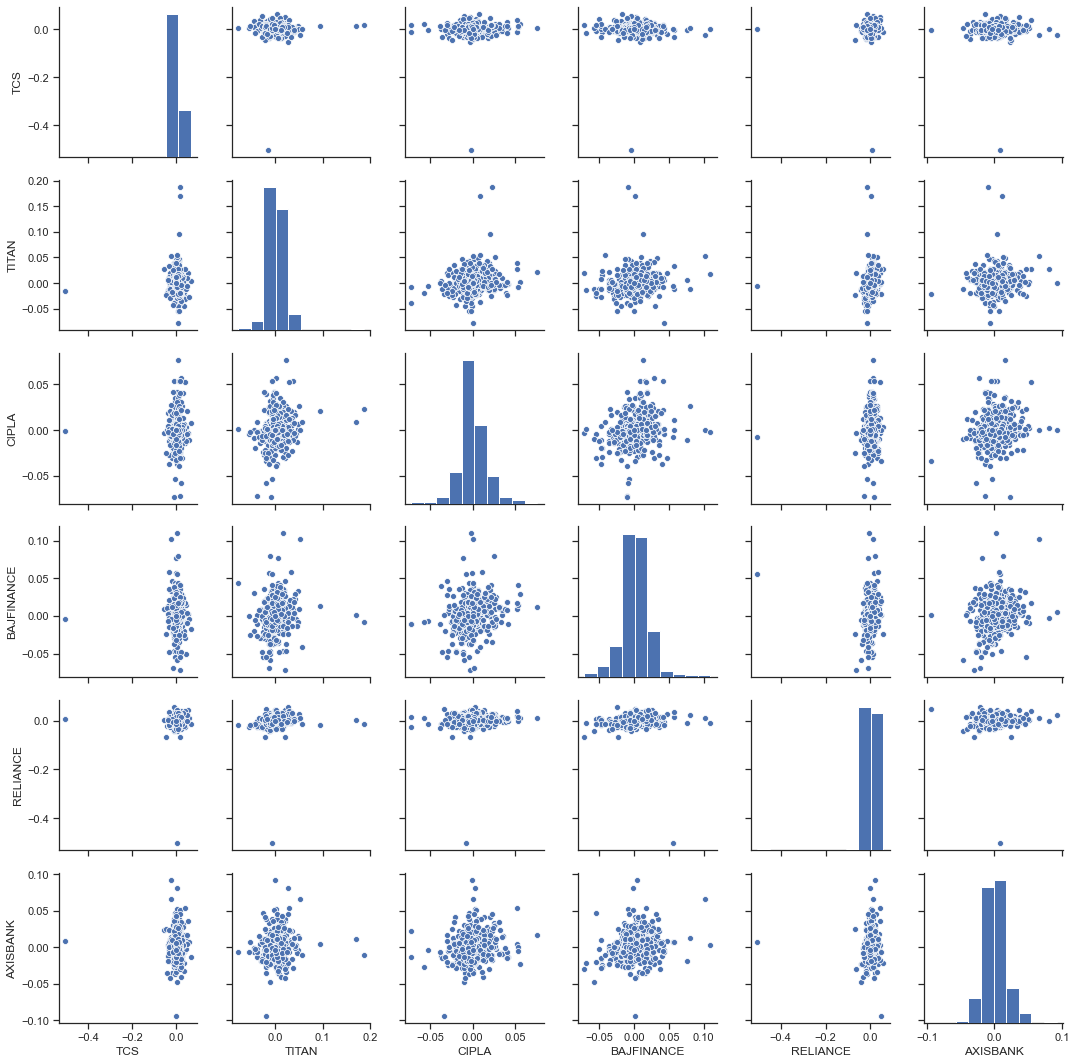

In [16]:
compare=compare.pct_change() #changing to percentage type
import seaborn as sns; sns.set(style='ticks', color_codes=True)
compare.replace([np.inf, -np.inf],np.nan) #using this to eliminate any infinity to -infinity values
#as well as any null values beacuse we are having values in percentages
compare.dropna(inplace=True,how='any',axis=0)
sns.pairplot(compare) #using pairplot to plot the dataframe

<b> Problem Statement 2.7 </b><br><br>
Volatility is the change in variance in the returns of a stock over a specific period of time.Do give the following documentation on volatility (https://www.investopedia.com/terms/v/volatility.asp) a read.
You have already calculated the percentage changes in several stock prices. Calculate the 7 day rolling average of the percentage change of any of the stock prices, then compute the standard deviation (which is the square root of the variance) and plot the values.
Note: pandas provides a rolling() function for dataframes and a std() function also which you can use.


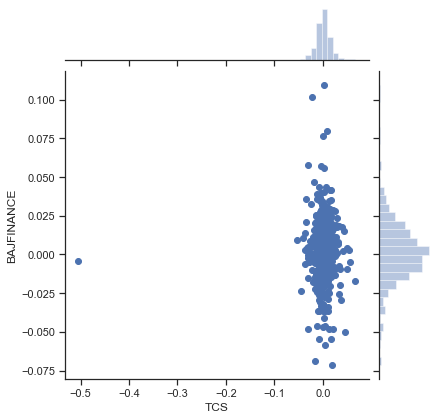

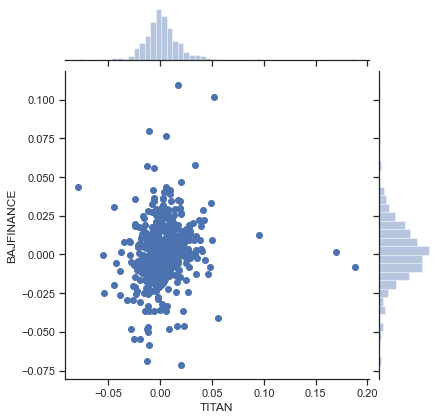

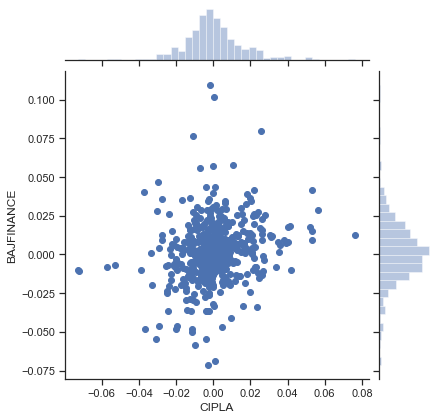

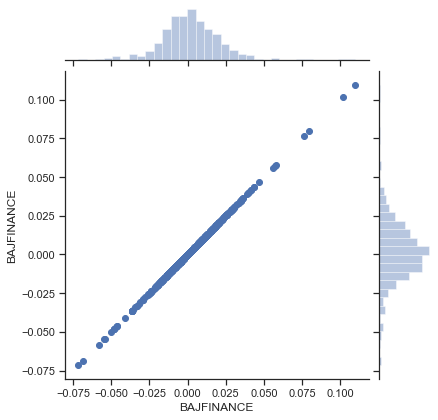

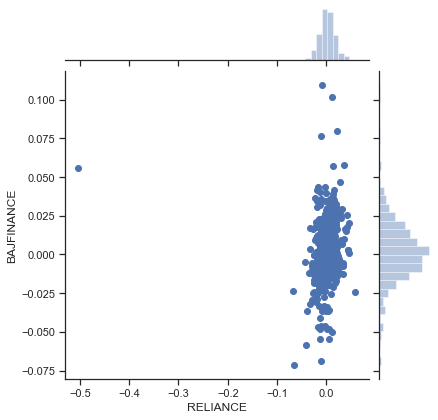

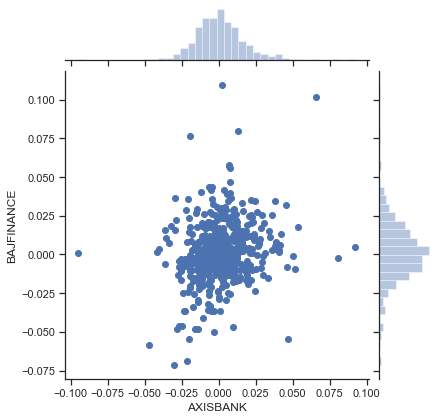

In [17]:
for i in compare.columns:
    sns.jointplot(i,'BAJFINANCE',compare,kind='scatter')
    

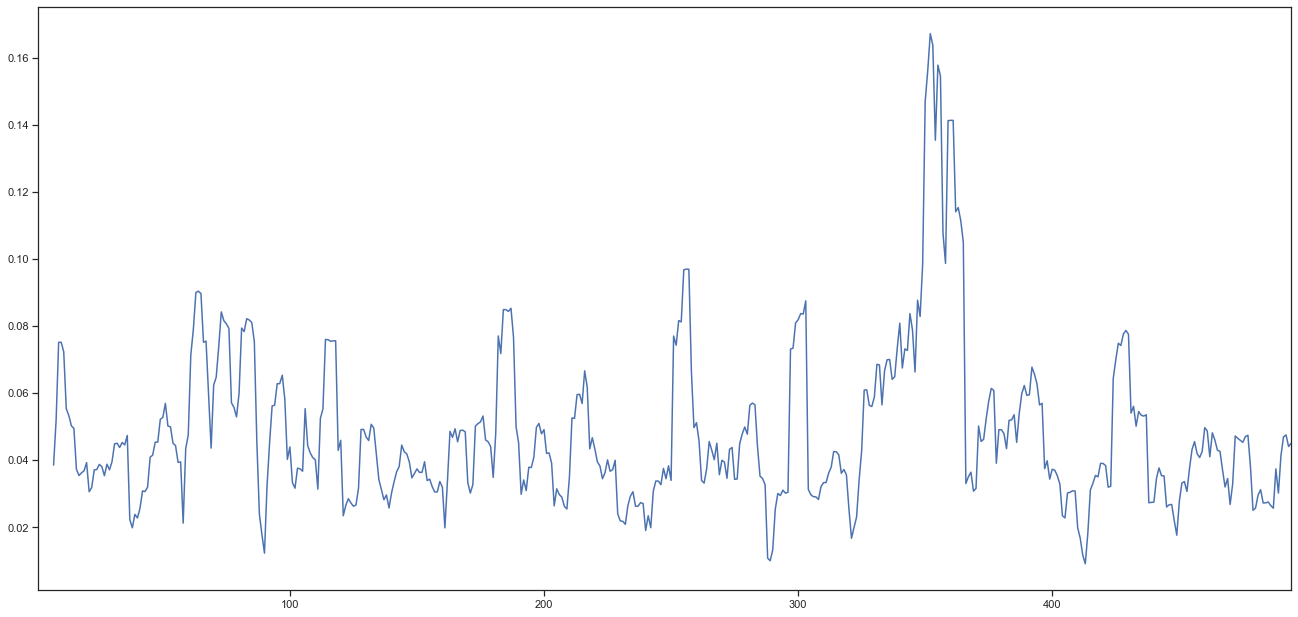

In [18]:
baj=compare['BAJFINANCE'].rolling(7).std()*np.sqrt(7)
baj.plot(figsize=(20,10))
plt.show()

<b>Problem Statement 2.8</b> <br><br>

Calculate the volatility for the Nifty index and compare the 2. This leads us to a useful indicator known as 'Beta' ( We'll be covering this in length in Module 3)


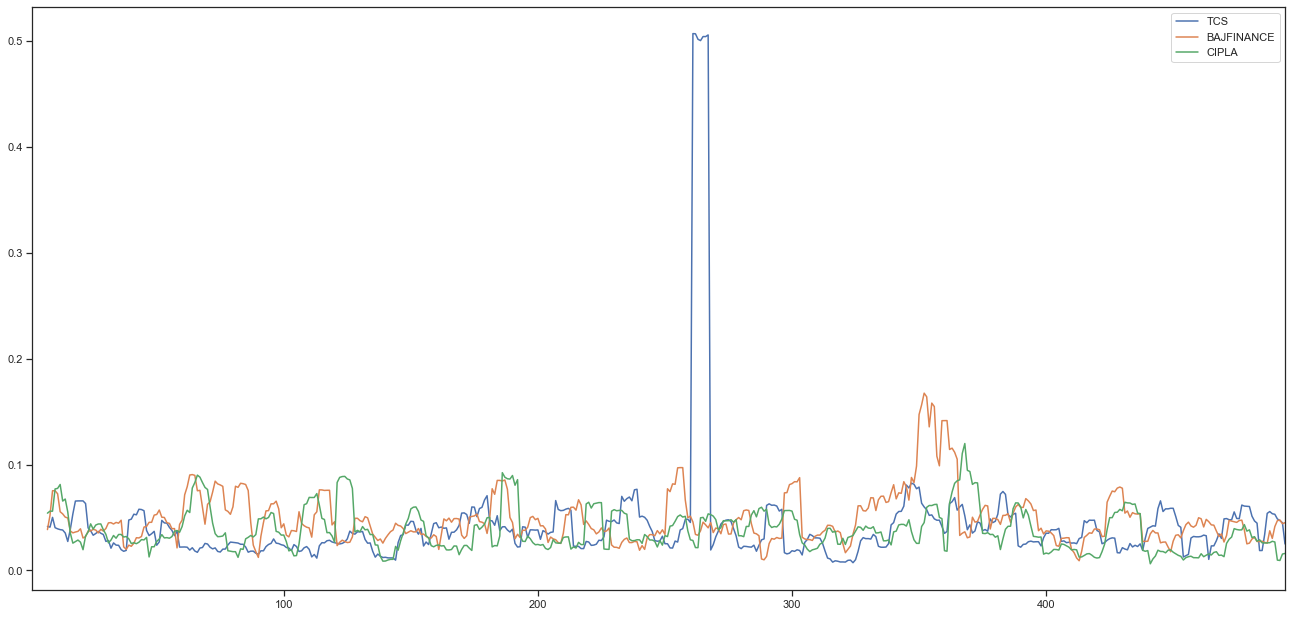

In [19]:
#volatility of the 3 stocks
compare=compare[['TCS','BAJFINANCE','CIPLA']]
vol=compare.rolling(7).std()*np.sqrt(7)
vol.plot(figsize=(20,10))
plt.show()

<b> Problem Statement 2.9</b> <br><br>
Trade Calls - Using Simple Moving Averages. Study about moving averages here (https://www.investopedia.com/terms/s/sma.asp).

Plot the 21 day and 34 day Moving average with the average price and decide a Call !
Call should be buy whenever the smaller moving average (21) crosses over longer moving average (34) AND the call should  be sell whenever smaller moving average crosses under longer moving average.
One of the most widely used technical indicators.


In [20]:
signals=pd.DataFrame(index=data.index) #using the main dataset taken
signals['signal']=0.0 #signal will be 0 if you want to sell and 1 if you want to buy

#For 21 days
signals['21_SMA']=data['Close Price'].rolling(window=21,min_periods=1).mean()

#For 34 days
signals['34_SMA']=data['Close Price'].rolling(window=34,min_periods=1).mean()

#Create signals
signals['signal'][21:]=np.where(signals['21_SMA'][21:]> signals['34_SMA'][21:],1.0,0.0)

#Generate trading orders
signals['positions']=signals['signal'].diff

print(signals)


            signal       21_SMA       34_SMA  \
Date                                           
2017-05-15     0.0  1553.400000  1553.400000   
2017-05-16     0.0  1556.525000  1556.525000   
2017-05-17     0.0  1556.733333  1556.733333   
2017-05-18     0.0  1556.825000  1556.825000   
2017-05-19     0.0  1557.710000  1557.710000   
...            ...          ...          ...   
2019-05-07     1.0  2292.223810  2289.389706   
2019-05-08     1.0  2292.914286  2291.816176   
2019-05-09     1.0  2293.245238  2292.930882   
2019-05-10     0.0  2292.811905  2293.961765   
2019-05-13     0.0  2292.707143  2294.533824   

                                                    positions  
Date                                                           
2017-05-15  <bound method Series.diff of Date\n2017-05-15 ...  
2017-05-16  <bound method Series.diff of Date\n2017-05-15 ...  
2017-05-17  <bound method Series.diff of Date\n2017-05-15 ...  
2017-05-18  <bound method Series.diff of Date\n2017-05-

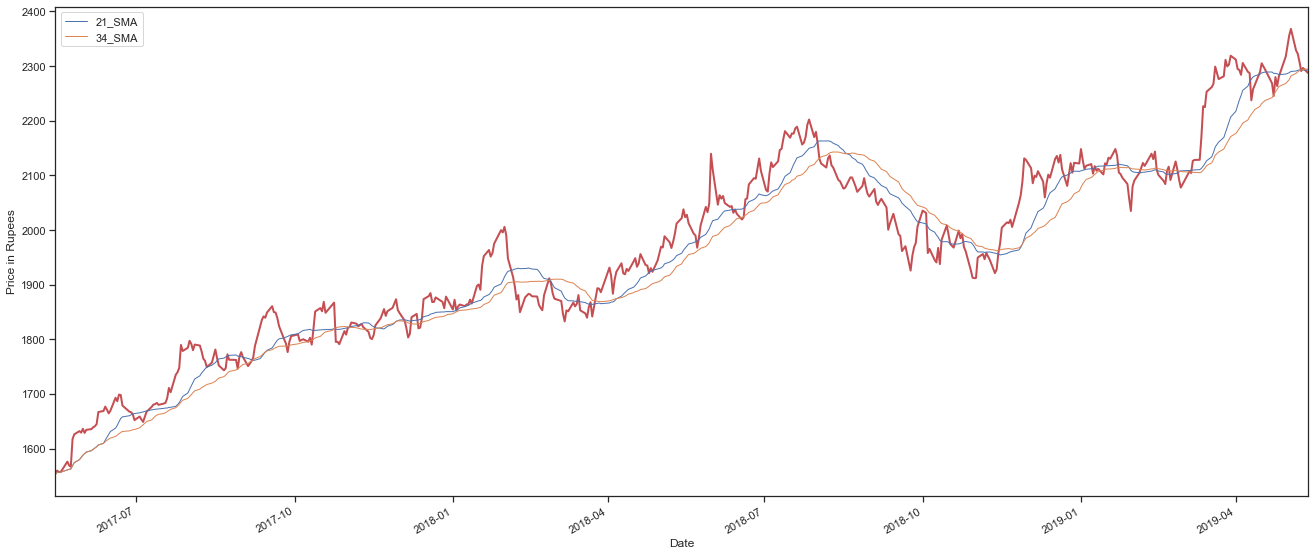

In [21]:
fig=plt.figure(figsize=(20,10))

#Add a subplot and label for y-axis
ax1=fig.add_subplot(111,ylabel='Price in Rupees')

#Plot the closing price
data['Close Price'].plot(ax=ax1, color='r', lw=2.)

#Plot the short and long moving averages
signals[['21_SMA', '34_SMA']].plot(ax=ax1,lw=1.)

#Plot the buy signals
ax1.plot(signals.loc[signals.positions==1.0].index,signals['21_SMA'][signals.positions==1.0],'^', markersize=20,color='g')

#Plot the sellsignals
ax1.plot(signals.loc[signals.positions==-1.0].index,signals['21_SMA'][signals.positions==-1.0],'v', markersize=20,color='k')

plt.show()

<b>Problem Statement 2.10 </b> <br><br>
Trade Calls - Using Bollinger Bands (https://www.investopedia.com/terms/b/bollingerbands.asp)
Plot the bollinger bands for this stock - the duration of 14 days and 2 standard deviations away from the average The bollinger bands comprise the following data points-
 The 14 day rolling mean of the closing price (we call it the average)

 Upper band which is the rolling mean + 2 standard deviations away from the average.

 Lower band which is the rolling mean - 2 standard deviations away from the average.

 Average Daily stock price.
Bollinger bands are extremely reliable , with a 95% accuracy at 2 standard deviations , and especially useful in sideways moving market.
Observe the bands yourself , and analyse the accuracy of all the trade signals provided by the bollinger bands.


In [22]:
def bbands(price,length=14,numsd=2):
    ave=price.rolling(length).mean()
    sd=price.rolling(length).std()
    upband=ave+(sd*numsd)
    dnband=ave-(sd*numsd)
    return np.round(ave,3), np.round(upband,3), np.round(dnband,3)
data['ave'],data['upper'], data['lower']=bbands(data['Close Price'])


,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,...,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,month,Day_Perc_Change,Trend,ave,upper,lower
Date,,,,,,,,,,,,,,,,,,,,,
2019-05-07,HDFCBANK,EQ,2019-05-07,2328.45,2351.90,2358.00,2318.00,2320.1,2322.35,2338.90,...,5.802928e+09,114540,1326590,53.47,May-2019,-0.261977,Slight or No Change,2298.779,2370.682,2226.875
2019-05-08,HDFCBANK,EQ,2019-05-08,2322.35,2322.55,2323.80,2288.00,2309.0,2307.25,2304.51,...,6.950518e+09,101965,1942147,64.39,May-2019,-0.650203,Slight Negative,2301.779,2371.115,2232.442
2019-05-09,HDFCBANK,EQ,2019-05-09,2307.25,2300.00,2300.00,2271.60,2292.0,2290.90,2287.67,...,5.163124e+09,129719,1470611,65.16,May-2019,-0.708636,Slight Negative,2301.929,2371.153,2232.704
2019-05-10,HDFCBANK,EQ,2019-05-10,2290.90,2291.35,2324.90,2291.35,2296.5,2296.50,2306.93,...,6.110008e+09,79307,1542118,58.22,May-2019,0.244445,Slight or No Change,2301.318,2370.574,2232.061
2019-05-13,HDFCBANK,EQ,2019-05-13,2296.50,2296.05,2313.35,2280.00,2287.3,2287.20,2297.73,...,6.359892e+09,145875,1652663,59.71,May-2019,-0.404964,Slight or No Change,2300.857,2370.419,2231.296


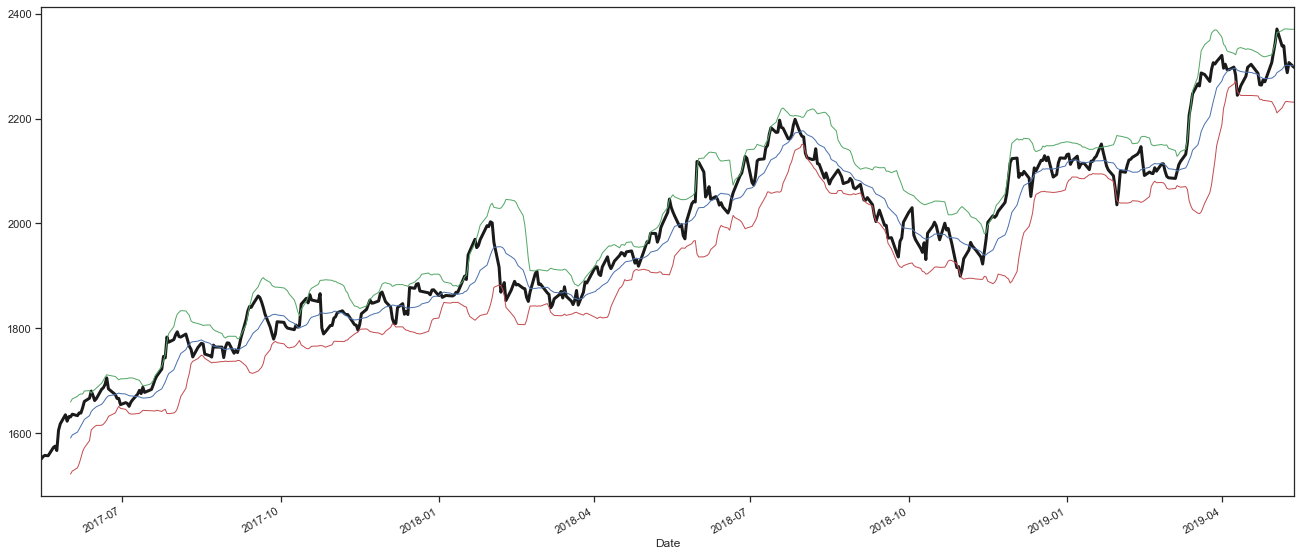

In [23]:
data['Average Price'].plot(c='k',figsize=(20,10),lw=3)
data['ave'].plot(c='b',figsize=(20,10),lw=1)
data['upper'].plot(c='g',figsize=(20,10),lw=1)
data['lower'].plot(c='r',figsize=(20,10),lw=1)

data.tail()


In [24]:
data.drop('Date',axis=1, inplace=True)
data.to_csv('data/week3.csv')